In [1]:
%run ../../multibench.py

In [2]:
%%bash
alias cobs=/home/manzik/Documents/cmdbench/repo/bioinformatics/cobs/basic-test/cobs/build/src/cobs

In [3]:
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [4]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]
print(input_samples)

['2014C-3599', '2014C-3656', '2014C-3840', '2014C-3655', '2014C-3598', '2014C-3850', '2014C-3857', '2014C-3907', '2014C-3600']


In [5]:
sample_sizes = list(range(1, len(input_samples) + 1))
sample_sizes

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
create_folder_if_doesnt_exist("cobs-data")
create_folder_if_doesnt_exist("cobs-data/samples")

In [ ]:
def reset_func():
    clean_if_exists("cobs-data/samples/")
    clean_if_exists("cobs-data/example.cobs_compact")
    clean_if_exists("cobs-data/example.cobs_compact.tmp")
    pass
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def sampling_func(sample_size):
    # Copy files we want to be part of the sample
    # from inputs to cobs-data/samples/ and return their path
    samples = input_samples[:sample_size]
    samples_out = []
    for sample in samples:
        infile1, infile2 = "input/%s_1.fastq.gz" % sample, "input/%s_2.fastq.gz" % sample
        outfile1, outfile2 = "cobs-data/samples/%s_1.fastq.gz" % sample, "cobs-data/samples/%s_2.fastq.gz" % sample
        copyfile(infile1, outfile1)
        copyfile(infile2, outfile2)
    return ["cobs-data/samples/"]

build_command = {
    "command": "cobs/build/src/cobs compact-construct % cobs-data/example.cobs_compact",
    "parallel_args": "-j 1 -I%"
}

query_repeat_count = 2
query_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG"

query_command = {
    "command": "cobs/build/src/cobs query -i cobs-data/example.cobs_compact %",
    "parallel_argfiles": [query_sequence] * query_repeat_count,
    "parallel_args": "-j 1 -I%"
}

# active_output_print: prints stdout and stderr on every iteration
multibench_results, debug_str = multi_cmdbench({
"index": [build_command],
"query": [query_command]
}, reset_func = reset_func, iterations = 2, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark_list_to_results, active_output_print = True)


In [8]:
multibench_results

[{'index': {'memory': 28561408.0,
   'disk_read': 3374088.0,
   'disk_write': 5637071.0,
   'runtime': 0.10500000000000001},
  'query': {'memory': 28461056.0,
   'disk_read': 2133331.0,
   'disk_write': 245775.0,
   'runtime': 0.09}},
 {'index': {'memory': 27813888.0,
   'disk_read': 3776730.5,
   'disk_write': 5659585.0,
   'runtime': 0.11499999999999999},
  'query': {'memory': 27752448.0,
   'disk_read': 2133257.0,
   'disk_write': 241640.5,
   'runtime': 0.09}},
 {'index': {'memory': 28508160.0,
   'disk_read': 4193531.0,
   'disk_write': 5686119.5,
   'runtime': 0.125},
  'query': {'memory': 27518976.0,
   'disk_read': 2133325.0,
   'disk_write': 245771.0,
   'runtime': 0.08}},
 {'index': {'memory': 25620480.0,
   'disk_read': 4651204.5,
   'disk_write': 5702718.0,
   'runtime': 0.14},
  'query': {'memory': 28254208.0,
   'disk_read': 2133251.0,
   'disk_write': 245736.0,
   'runtime': 0.08}},
 {'index': {'memory': 27676672.0,
   'disk_read': 5963515.5,
   'disk_write': 6326303.5,


In [9]:
save_path = "multibench_results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

save_multibench_results(multibench_results, samples_per_sample_size, save_path)

In [10]:
read_path = "multibench_results.txt"

multibench_results, samples_per_sample_size = read_multibench_results(read_path)
print(multibench_results)
print(samples_per_sample_size)

[{'index': {'runtime': 0.105, 'memory': 28561408.0, 'disk_read': 3374088.0, 'disk_write': 5637071.0}, 'query': {'runtime': 0.09, 'memory': 28461056.0, 'disk_read': 2133331.0, 'disk_write': 245775.0}}, {'index': {'runtime': 0.115, 'memory': 27813888.0, 'disk_read': 3776730.5, 'disk_write': 5659585.0}, 'query': {'runtime': 0.09, 'memory': 27752448.0, 'disk_read': 2133257.0, 'disk_write': 241640.5}}, {'index': {'runtime': 0.125, 'memory': 28508160.0, 'disk_read': 4193531.0, 'disk_write': 5686119.5}, 'query': {'runtime': 0.08, 'memory': 27518976.0, 'disk_read': 2133325.0, 'disk_write': 245771.0}}, {'index': {'runtime': 0.14, 'memory': 25620480.0, 'disk_read': 4651204.5, 'disk_write': 5702718.0}, 'query': {'runtime': 0.08, 'memory': 28254208.0, 'disk_read': 2133251.0, 'disk_write': 245736.0}}, {'index': {'runtime': 0.15, 'memory': 27676672.0, 'disk_read': 5963515.5, 'disk_write': 6326303.5}, 'query': {'runtime': 0.08, 'memory': 27746304.0, 'disk_read': 2133427.5, 'disk_write': 245918.0}}, {

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 0.105, 'memory': 28561408.0, 'disk_read': 3374088.0, 'disk_write': 5637071.0}, {'runtime': 0.115, 'memory': 27813888.0, 'disk_read': 3776730.5, 'disk_write': 5659585.0}, {'runtime': 0.125, 'memory': 28508160.0, 'disk_read': 4193531.0, 'disk_write': 5686119.5}, {'runtime': 0.14, 'memory': 25620480.0, 'disk_read': 4651204.5, 'disk_write': 5702718.0}, {'runtime': 0.15, 'memory': 27676672.0, 'disk_read': 5963515.5, 'disk_write': 6326303.5}, {'runtime': 0.17, 'memory': 27539456.0, 'disk_read': 6415108.0, 'disk_write': 6334776.0}, {'runtime': 0.16, 'memory': 28307456.0, 'disk_read': 6858726.0, 'disk_write': 6343281.5}, {'runtime': 0.16, 'memory': 27641856.0, 'disk_read': 7325731.0, 'disk_write': 6346781.5}, {'runtime': 0.18, 'memory': 27213824.0, 'disk_read': 8590569.5, 'disk_write': 6950736.0}]


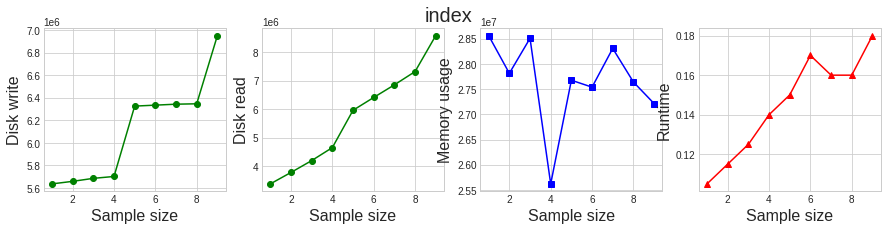

In [13]:
# Indexing Plots
plot_resources(multibench_results, sample_sizes, "index")

[{'runtime': 0.09, 'memory': 28461056.0, 'disk_read': 2133331.0, 'disk_write': 245775.0}, {'runtime': 0.09, 'memory': 27752448.0, 'disk_read': 2133257.0, 'disk_write': 241640.5}, {'runtime': 0.08, 'memory': 27518976.0, 'disk_read': 2133325.0, 'disk_write': 245771.0}, {'runtime': 0.08, 'memory': 28254208.0, 'disk_read': 2133251.0, 'disk_write': 245736.0}, {'runtime': 0.08, 'memory': 27746304.0, 'disk_read': 2133427.5, 'disk_write': 245918.0}, {'runtime': 0.08, 'memory': 28393472.0, 'disk_read': 2133337.5, 'disk_write': 245870.0}, {'runtime': 0.095, 'memory': 28594176.0, 'disk_read': 2133359.5, 'disk_write': 245883.0}, {'runtime': 0.085, 'memory': 23042048.0, 'disk_read': 2133405.5, 'disk_write': 237709.0}, {'runtime': 0.08, 'memory': 28459008.0, 'disk_read': 2133346.0, 'disk_write': 249971.5}]


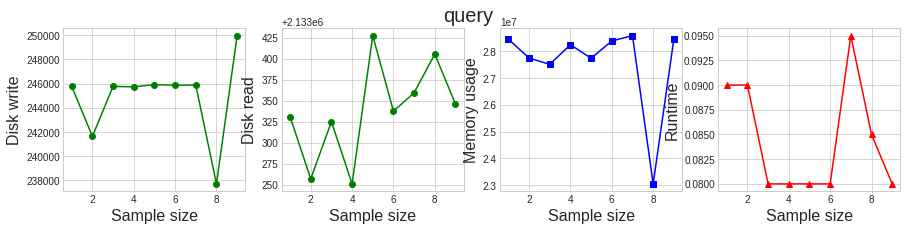

In [14]:
# Querying Plots
plot_resources(multibench_results, sample_sizes, "query")